По данным из датасета https://www.kaggle.com/datasets/omkarborikar/top-10000-popular-movies необходимо предсказать длительность фильма по представленным признакам. Это задача классификации.  

Датасет содержит 10000 строк и 12 столбцов.


Целевой признак - время длительность runtime. Пусть будет три класса:
* _Короткий фильм_ - от 0 до 80 минут;
* _Средний фильм_ - от 80 до 120 минут;
* _Длинный фильм_ - от 120 до 400 минут. 

Этот набор данных включает следующий набор признаков:

Описание признаков:

| Поз. |  Имя признака | Описание |
| :-: | :-: | :- |
| 1. | **id** | У каждого фильма есть свой уникальный ID. | 
| 2. | **original_language** | Язык фильма в формате ISO 639-1.|
| 3. | **original_title** | Название фильма.|
| 4. | **popularity** | Популярность фильма, чем больше число тем популярнее.|
| 5. | **release_date** | Дата выхода фильма. Если ее нет - значит фильм еще не вышел.|
| 6. | **vote_average** | Средняя оценка фильма. |
| 7. | **vote_count** | Количество оценок фильма. |
| 8. | **genre** | Жанр фильма.|
| 9. | **overview** | Краткое описание фильма в виде текста. |
| 10. | **revenue** | Доход от фильма.|
| 11. | **runtime** | Длительность фильма в минутах, целевой признак. |
| 12. | **tagline** | Слоган фильма. |

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Импорт датасета

In [2]:
data = pd.read_csv('Top_10000_Movies.csv', lineterminator='\n')

data = data.drop('Unnamed: 0', axis='columns')
print(f"Размеры датасета = {data.shape}")
rows, columns = data.shape
print(f"Число объектов = {rows}")
print(f"Число признаков = {columns}")
data.head(13)

Размеры датасета = (10000, 12)
Число объектов = 10000
Число признаков = 12


,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,580489,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000,97.0,NaN
1,524434,en,Eternals,3365.535,2021-11-03,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000,157.0,In the beginning...
2,438631,en,Dune,2911.423,2021-09-15,8.0,3632,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356,155.0,"Beyond fear, destiny awaits."
3,796499,en,Army of Thieves,2552.437,2021-10-27,6.9,555,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0,127.0,"Before Vegas, one locksmith became a legend."
4,550988,en,Free Guy,1850.470,2021-08-11,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766,115.0,Life's too short to be a background character.
5,574060,en,Gunpowder Milkshake,1453.423,2021-07-14,6.5,347,"['Action', 'Thriller', 'Crime']",In her turbulent life as a professional assass...,344931,114.0,Revenge is best served ice cold.
6,335983,en,Venom,1212.352,2018-09-28,6.8,12126,"['Science Fiction', 'Action']",Investigative journalist Eddie Brock attempts ...,855013954,112.0,The world has enough Superheroes.
7,610253,en,Halloween Kills,1023.024,2021-10-14,7.0,1134,"['Horror', 'Thriller']","Minutes after Laurie Strode, her daughter Kare...",118852075,105.0,Evil dies tonight.
8,871964,pl,W lesie dziś nie zaśnie nikt 2,1089.852,2021-10-27,4.1,72,"['Horror', 'Thriller']",When something horrible happens to the only su...,0,96.0,NaN
9,768449,en,American Badger,1148.822,2021-03-05,6.3,14,"['Action', 'Thriller']",A seemingly cold-blooded hitman is assigned to...,0,88.0,Justice Before Redemption


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   original_language  10000 non-null  object 
 2   original_title     10000 non-null  object 
 3   popularity         10000 non-null  float64
 4   release_date       9962 non-null   object 
 5   vote_average       10000 non-null  float64
 6   vote_count         10000 non-null  int64  
 7   genre              10000 non-null  object 
 8   overview           9900 non-null   object 
 9   revenue            10000 non-null  int64  
 10  runtime            9991 non-null   float64
 11  tagline            7080 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 937.6+ KB


In [4]:
data.describe()

,id,popularity,vote_average,vote_count,revenue,runtime
count,10000.0000,10000.000000,10000.00000,10000.000000,1.000000e+04,9991.000000
mean,250053.0833,34.516871,6.29875,1315.084900,5.736388e+07,98.773596
std,261734.6183,100.693958,1.43426,2501.899103,1.480771e+08,28.800581
min,5.0000,6.269000,0.00000,0.000000,0.000000e+00,0.000000
25%,11866.7500,11.908000,5.90000,118.000000,0.000000e+00,89.000000
50%,144476.0000,17.488000,6.50000,425.500000,5.912300e+05,99.000000
75%,451485.0000,29.626250,7.10000,1297.250000,4.764549e+07,113.000000
max,893478.0000,5401.308000,9.50000,30184.000000,2.847246e+09,400.000000


Многие признаки имеют объектный тип, заменим на специальный категориальный:

In [5]:
data['original_language'] = data['original_language'].astype('category')
data['original_title'] = data['original_title'].astype('category')
data['release_date'] = data['release_date'].astype('category')
data['genre'] = data['genre'].astype('category')
data['overview'] = data['overview'].astype('category')
data['tagline'] = data['tagline'].astype('category')

In [6]:
data.describe(include=['category'])

,original_language,original_title,release_date,genre,overview,tagline
count,10000,10000,9962,10000,9900,7080
unique,47,9756,5727,2314,9895,7042
top,en,Venom,2021-11-11,['Drama'],Dr. Raichi is one of the only survivors of the...,Based on a true story.
freq,7798,5,51,533,2,4


Удалим столбцы original_title, overview, release_date и tagline из-за большого количества значений и предположительно малого влияния на конечный результат.

In [7]:
data = data.drop(columns = 'original_title')
data = data.drop(columns = 'overview')
data = data.drop(columns = 'tagline')
data = data.drop(columns = 'release_date')

In [8]:
data.columns

Index(['id', 'original_language', 'popularity', 'vote_average', 'vote_count',
       'genre', 'revenue', 'runtime'],
      dtype='object')

Посмотрим количество пустых значений по столбцам:

In [9]:
data.isnull().sum()

id                   0
original_language    0
popularity           0
vote_average         0
vote_count           0
genre                0
revenue              0
runtime              9
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 10000 non-null  int64   
 1   original_language  10000 non-null  category
 2   popularity         10000 non-null  float64 
 3   vote_average       10000 non-null  float64 
 4   vote_count         10000 non-null  int64   
 5   genre              10000 non-null  category
 6   revenue            10000 non-null  int64   
 7   runtime            9991 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 582.2 KB


Два метода подтверждают данные по not-null значениям. Можно было бы заменить отсутствующие значнеия медианными, но значения отсутствуют в целевом классе. Поэтому будет правильнее удалить эти строки. 

In [11]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9991 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 9991 non-null   int64   
 1   original_language  9991 non-null   category
 2   popularity         9991 non-null   float64 
 3   vote_average       9991 non-null   float64 
 4   vote_count         9991 non-null   int64   
 5   genre              9991 non-null   category
 6   revenue            9991 non-null   int64   
 7   runtime            9991 non-null   float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 659.7 KB


In [12]:

print(f"Размеры датасета = {data.shape}")
rows, columns = data.shape
print(f"Число объектов = {rows}")
print(f"Число признаков = {columns}")
print(f"Количество пропущенных значений = {data.isna().sum().sum()}")
print("Кол-во объектов =", rows)

Размеры датасета = (9991, 8)
Число объектов = 9991
Число признаков = 8
Количество пропущенных значений = 0
Кол-во объектов = 9991


## **Визуализация данных**

Несбалансированность классов.

<Axes: xlabel='runtime', ylabel='count'>

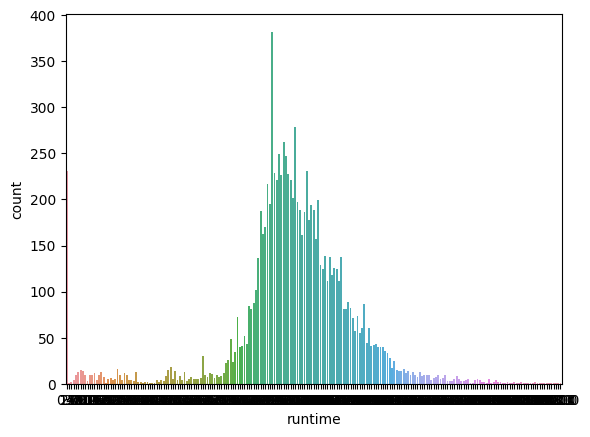

In [13]:
sns.countplot(data=data, x="runtime")

На этом графике неплохо видно, какой из классов преобладает, но все же это плохой график и лучше его перестроить. Для этого будет удобно ввести новую колонку с именем Class, где будет указана принадлежность строки к тому или иному классу. Также для удобства сделаем новый признак типа int со следующими заменами:

* Короткий фильм - 1
* Средний фильм - 2
* Длинный фильм - 3

In [14]:
data = data.assign( Class = 2 ) #т.к. 2 класс встречается чаще всего
for i in range (len(data.runtime)):
    if data.iloc[i, 7] < 80.:
        data.iat[i, 8] = 1
    elif data.iloc[i, 7] > 120.:
        data.iat[i, 8] = 3
data

,id,original_language,popularity,vote_average,vote_count,genre,revenue,runtime,Class
0,580489,en,5401.308,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",424000000,97.0,2
1,524434,en,3365.535,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000,157.0,3
2,438631,en,2911.423,8.0,3632,"['Action', 'Adventure', 'Science Fiction']",331116356,155.0,3
3,796499,en,2552.437,6.9,555,"['Action', 'Crime', 'Thriller']",0,127.0,3
4,550988,en,1850.470,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766,115.0,2
...,...,...,...,...,...,...,...,...,...
9995,530,en,9.266,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",0,23.0,1
9996,15934,en,10.417,7.0,80,"['History', 'Drama', 'Music']",0,116.0,2
9997,162215,en,9.520,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",0,101.0,2
9998,5723,en,9.267,7.4,990,"['Drama', 'Music', 'Romance']",20710513,85.0,2


<Axes: xlabel='Class', ylabel='count'>

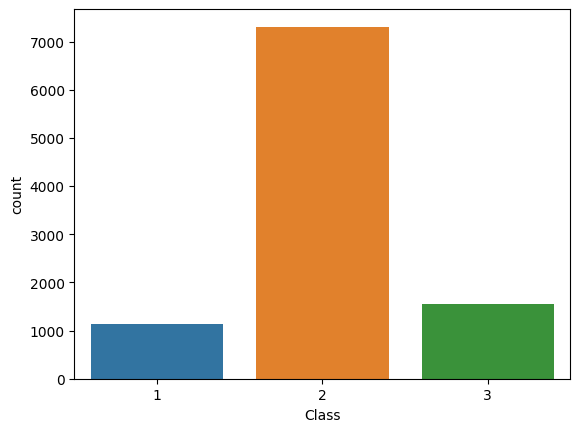

In [15]:
sns.countplot(data=data, x="Class")

Поделим признаки на числовые и категориальные

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

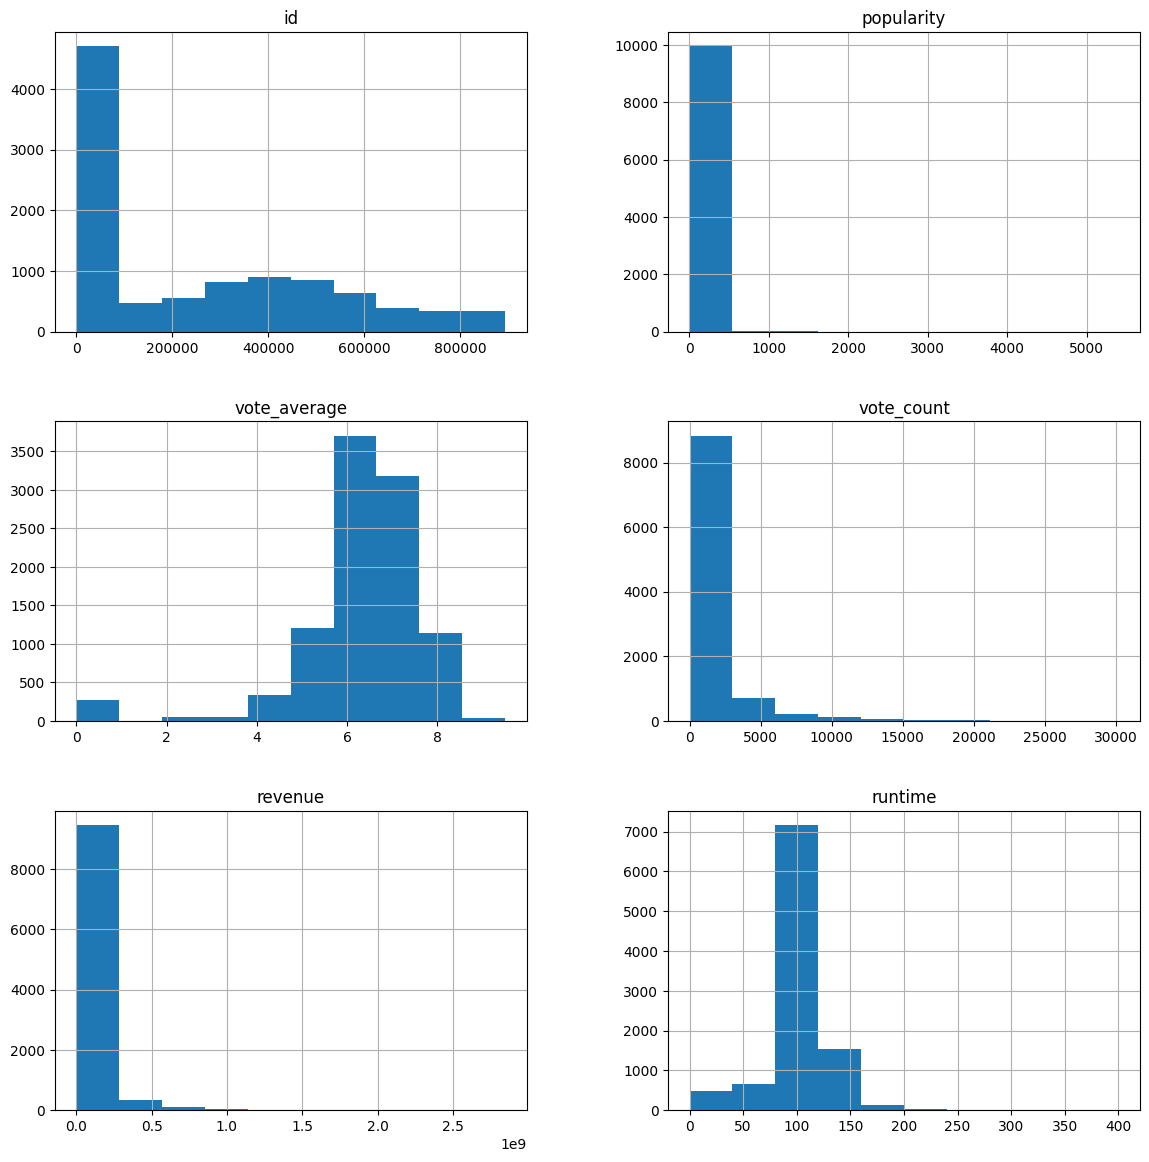

In [16]:
num_col = ['id',
           'popularity',
           'vote_average',
           'vote_count',
           'revenue',
           'runtime'
]

cat_col = ['original_language', 'genre']
data.hist(column = num_col, figsize = (14, 14))

Сделаем проверку на выбросы. 

<Axes: xlabel='Class', ylabel='id'>

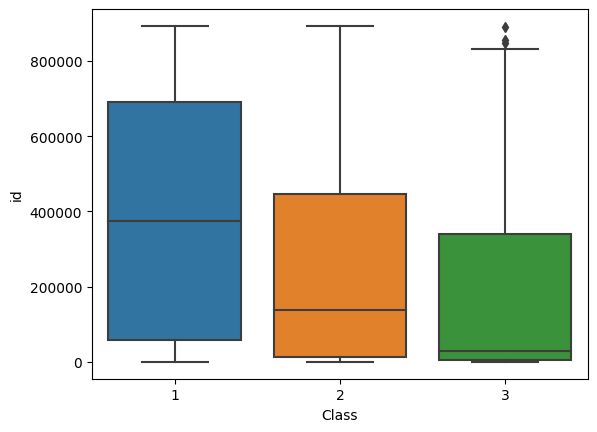

In [17]:
sns.boxplot(data=data, x="Class", y="id")

Построим корелляционную матрицу.

<Axes: >

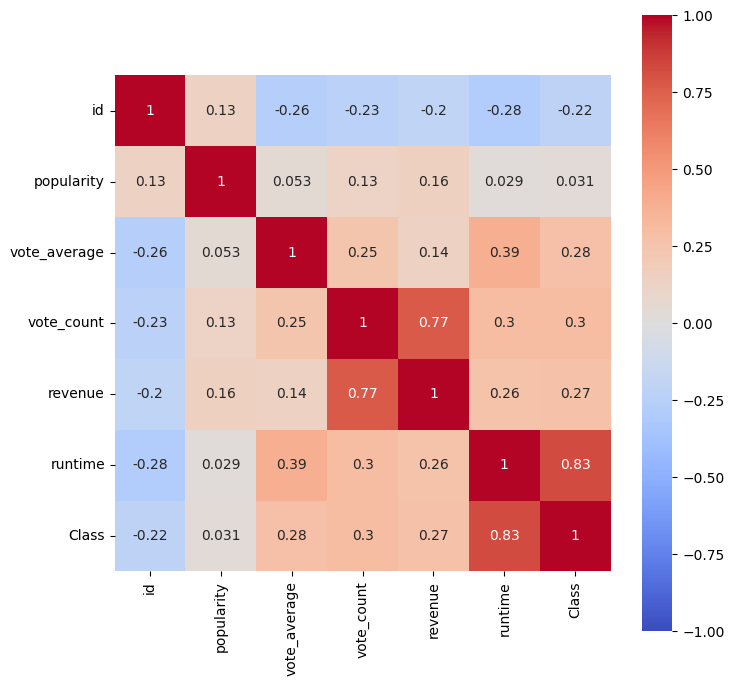

In [18]:
fig, ax = plt.subplots(figsize = (8, 8))
data_col = data.drop(['original_language', 'genre'], axis = 1)
sns.heatmap(data_col.corr(), square = True, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

In [19]:
s = []
for i in range (len(data.genre)):
    j = data.iloc[i,5][1:len(data.iloc[i,5])-1]
    j = j.split(', ')
    for k in range (len(j)):
        j[k] = j[k][1:len(j[k])-1]
        s.append(j[k])
s = list(set(s))
print(s)

['', 'History', 'Music', 'Animation', 'Mystery', 'Crime', 'Romance', 'Comedy', 'TV Movie', 'Action', 'War', 'Science Fiction', 'Fantasy', 'Family', 'Adventure', 'Western', 'Documentary', 'Drama', 'Horror', 'Thriller']


In [20]:

data = data.assign( Western = 0 )
data = data.assign( Animation = 0 )
data = data.assign( Romance = 0 )
data = data.assign( Adventure = 0 )
data = data.assign( Music = 0 )
data = data.assign( Mystery = 0 )
data = data.assign( Horror= 0 )
data = data.assign( Family= 0 )
data = data.assign( War = 0 )
data = data.assign( Fantasy= 0 )
data = data.assign( TV_Movie = 0 )
data = data.assign( Crime = 0 )
data = data.assign( Action = 0 )
data = data.assign( Science_Fiction = 0 )
data = data.assign( History= 0 )
data = data.assign( Drama = 0 )
data = data.assign( Science_Fiction = 0 )
data = data.assign( Comedy = 0 )
data = data.assign( Documentary = 0 )
data = data.assign( Thriller = 0 )
data

,id,original_language,popularity,vote_average,vote_count,genre,revenue,runtime,Class,Western,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
0,580489,en,5401.308,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",424000000,97.0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,524434,en,3365.535,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000,157.0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,438631,en,2911.423,8.0,3632,"['Action', 'Adventure', 'Science Fiction']",331116356,155.0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,796499,en,2552.437,6.9,555,"['Action', 'Crime', 'Thriller']",0,127.0,3,0,...,0,0,0,0,0,0,0,0,0,0
4,550988,en,1850.470,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766,115.0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,9.266,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",0,23.0,1,0,...,0,0,0,0,0,0,0,0,0,0
9996,15934,en,10.417,7.0,80,"['History', 'Drama', 'Music']",0,116.0,2,0,...,0,0,0,0,0,0,0,0,0,0
9997,162215,en,9.520,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",0,101.0,2,0,...,0,0,0,0,0,0,0,0,0,0
9998,5723,en,9.267,7.4,990,"['Drama', 'Music', 'Romance']",20710513,85.0,2,0,...,0,0,0,0,0,0,0,0,0,0


Проверка на содержание названия жанров в других названиях жанров

In [21]:
for i in s:
    if i in s:
        print(i)


History
Music
Animation
Mystery
Crime
Romance
Comedy
TV Movie
Action
War
Science Fiction
Fantasy
Family
Adventure
Western
Documentary
Drama
Horror
Thriller


In [22]:

for i in range (len(data.genre)):
    if 'Western' in data.iloc[i, 5]:
        data.iat[i, 9] = 1
    if 'Animation' in data.iloc[i, 5]:
        data.iat[i, 10] = 1
    if 'Romance' in data.iloc[i, 5]:
        data.iat[i, 11] = 1
    if 'Adventure' in data.iloc[i, 5]:
        data.iat[i, 12] = 1
    if 'Music' in data.iloc[i, 5]:
        data.iat[i, 13] = 1
    if 'Mystery' in data.iloc[i, 5]:
        data.iat[i, 14] = 1
    if 'Horror' in data.iloc[i, 5]:
        data.iat[i, 15] = 1
    if 'Family' in data.iloc[i, 5]:
        data.iat[i, 16] = 1
    if 'War' in data.iloc[i, 5]:
        data.iat[i, 17] = 1
    if 'Fantasy' in data.iloc[i, 5]:
        data.iat[i, 18] = 1
    if 'TV Movie' in data.iloc[i, 5]:
        data.iat[i, 19] = 1
    if 'Crime' in data.iloc[i, 5]:
        data.iat[i, 20] = 1
    if 'Action' in data.iloc[i, 5]:
        data.iat[i, 21] = 1
    if 'Science Fiction' in data.iloc[i, 5]:
        data.iat[i, 22] = 1
    if 'History' in data.iloc[i, 5]:
        data.iat[i, 23] = 1
    if 'Drama' in data.iloc[i, 5]:
        data.iat[i, 24] = 1
    if 'Comedy' in data.iloc[i, 5]:
        data.iat[i, 25] = 1
    if 'Documentary' in data.iloc[i, 5]:
        data.iat[i, 26] = 1
    if 'Thriller' in data.iloc[i, 5]:
        data.iat[i, 27] = 1

data

,id,original_language,popularity,vote_average,vote_count,genre,revenue,runtime,Class,Western,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
0,580489,en,5401.308,6.8,1736,"['Science Fiction', 'Action', 'Adventure']",424000000,97.0,2,0,...,0,0,0,1,1,0,0,0,0,0
1,524434,en,3365.535,7.1,622,"['Action', 'Adventure', 'Science Fiction', 'Fa...",165000000,157.0,3,0,...,1,0,0,1,1,0,0,0,0,0
2,438631,en,2911.423,8.0,3632,"['Action', 'Adventure', 'Science Fiction']",331116356,155.0,3,0,...,0,0,0,1,1,0,0,0,0,0
3,796499,en,2552.437,6.9,555,"['Action', 'Crime', 'Thriller']",0,127.0,3,0,...,0,0,1,1,0,0,0,0,0,1
4,550988,en,1850.470,7.8,3493,"['Comedy', 'Action', 'Adventure', 'Science Fic...",331096766,115.0,2,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,9.266,7.5,594,"['Adventure', 'Animation', 'Comedy', 'Science ...",0,23.0,1,0,...,0,0,0,0,1,0,0,1,0,0
9996,15934,en,10.417,7.0,80,"['History', 'Drama', 'Music']",0,116.0,2,0,...,0,0,0,0,0,1,1,0,0,0
9997,162215,en,9.520,6.6,705,"['Drama', 'Action', 'Thriller', 'War']",0,101.0,2,0,...,0,0,0,1,0,0,1,0,0,1
9998,5723,en,9.267,7.4,990,"['Drama', 'Music', 'Romance']",20710513,85.0,2,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
data.drop('genre', axis= 1 , inplace= True)
data

,id,original_language,popularity,vote_average,vote_count,revenue,runtime,Class,Western,Animation,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
0,580489,en,5401.308,6.8,1736,424000000,97.0,2,0,0,...,0,0,0,1,1,0,0,0,0,0
1,524434,en,3365.535,7.1,622,165000000,157.0,3,0,0,...,1,0,0,1,1,0,0,0,0,0
2,438631,en,2911.423,8.0,3632,331116356,155.0,3,0,0,...,0,0,0,1,1,0,0,0,0,0
3,796499,en,2552.437,6.9,555,0,127.0,3,0,0,...,0,0,1,1,0,0,0,0,0,1
4,550988,en,1850.470,7.8,3493,331096766,115.0,2,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,en,9.266,7.5,594,0,23.0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
9996,15934,en,10.417,7.0,80,0,116.0,2,0,0,...,0,0,0,0,0,1,1,0,0,0
9997,162215,en,9.520,6.6,705,0,101.0,2,0,0,...,0,0,0,1,0,0,1,0,0,1
9998,5723,en,9.267,7.4,990,20710513,85.0,2,0,0,...,0,0,0,0,0,0,1,0,0,0


<Axes: >

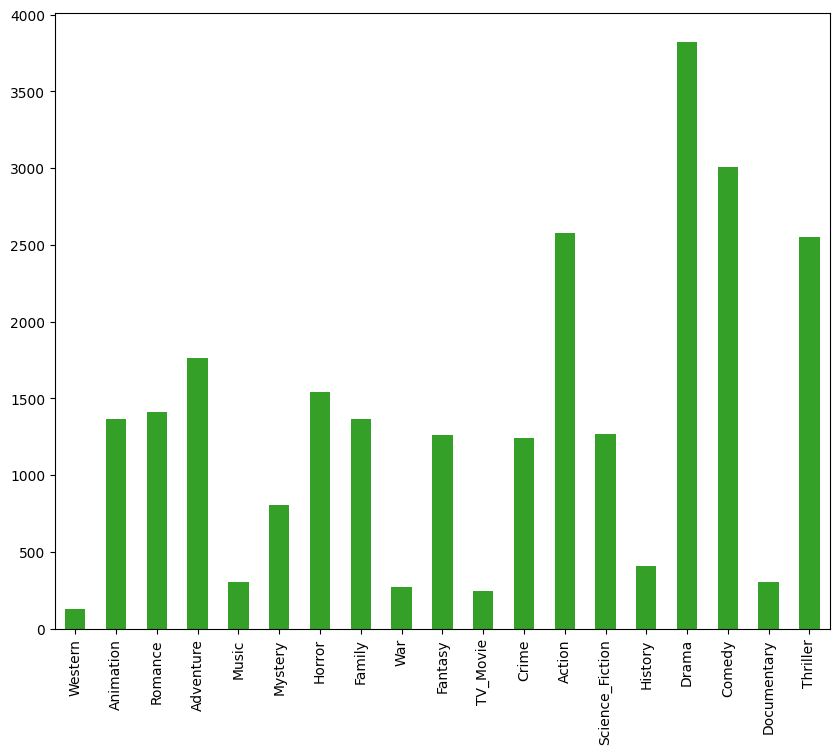

In [24]:
genre_data = data.iloc[:, 8:]
genre_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')

С языками все проще. Более 77% - английский, что может плохо сказать на обучении. Поэтому столбец лучше просто удалить.

In [25]:
data.drop('original_language', axis= 1 , inplace= True)
data

,id,popularity,vote_average,vote_count,revenue,runtime,Class,Western,Animation,Romance,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
0,580489,5401.308,6.8,1736,424000000,97.0,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,524434,3365.535,7.1,622,165000000,157.0,3,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,438631,2911.423,8.0,3632,331116356,155.0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,796499,2552.437,6.9,555,0,127.0,3,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,550988,1850.470,7.8,3493,331096766,115.0,2,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,9.266,7.5,594,0,23.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9996,15934,10.417,7.0,80,0,116.0,2,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9997,162215,9.520,6.6,705,0,101.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
9998,5723,9.267,7.4,990,20710513,85.0,2,0,0,1,...,0,0,0,0,0,0,1,0,0,0


## 3. Обучающая и тестовая выборки

In [28]:
y = data['Class']
X = data.copy(deep = True)
X

,id,popularity,vote_average,vote_count,revenue,runtime,Class,Western,Animation,Romance,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
0,580489,5401.308,6.8,1736,424000000,97.0,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,524434,3365.535,7.1,622,165000000,157.0,3,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,438631,2911.423,8.0,3632,331116356,155.0,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,796499,2552.437,6.9,555,0,127.0,3,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,550988,1850.470,7.8,3493,331096766,115.0,2,0,0,0,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,530,9.266,7.5,594,0,23.0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9996,15934,10.417,7.0,80,0,116.0,2,0,0,0,...,0,0,0,0,0,1,1,0,0,0
9997,162215,9.520,6.6,705,0,101.0,2,0,0,0,...,0,0,0,1,0,0,1,0,0,1
9998,5723,9.267,7.4,990,20710513,85.0,2,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 49)

In [30]:
X_train.shape

(7493, 26)

In [31]:
y_train.size

7493

In [34]:
y_train

9341    2
3921    2
1524    1
2317    3
2833    2
       ..
8056    2
7930    2
3254    2
5807    2
426     2
Name: Class, Length: 7493, dtype: int64

In [33]:
y_test

226     2
128     1
4386    2
7244    1
1433    1
       ..
9335    2
8371    2
4144    2
4958    2
630     3
Name: Class, Length: 2498, dtype: int64

Проведем масштабирование количественных признаков:

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)


In [36]:
X_train

,id,popularity,vote_average,vote_count,revenue,runtime,Class,Western,Animation,Romance,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
9341,-0.556887,-0.238894,-0.632073,-0.465514,-0.211321,0.176531,-0.085428,-0.114522,-0.393123,-0.414805,...,2.627548,-0.158665,-0.377590,1.700726,2.638713,-0.206693,-0.791924,1.517825,-0.185015,-0.580176
3921,-0.374515,-0.169422,-0.144495,-0.322836,-0.390077,0.524951,-0.085428,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,2.648378,-0.587984,-0.378973,-0.206693,1.262747,-0.658838,-0.185015,1.723616
1524,1.740854,0.291779,-0.701726,-0.522586,-0.390077,-3.272832,-2.025158,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,-0.377590,-0.587984,-0.378973,-0.206693,-0.791924,-0.658838,-0.185015,-0.580176
2317,-0.956256,-0.007442,0.830660,1.251852,0.722886,2.092843,1.854303,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,-0.377590,-0.587984,-0.378973,-0.206693,1.262747,-0.658838,-0.185015,1.723616
2833,-0.955066,-0.034080,0.552044,0.324643,0.151664,0.559793,-0.085428,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,-0.377590,1.700726,-0.378973,-0.206693,-0.791924,-0.658838,-0.185015,1.723616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,-0.942351,-0.237058,0.273429,0.040894,-0.040533,-0.032522,-0.085428,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,-0.377590,1.700726,-0.378973,-0.206693,-0.791924,1.517825,-0.185015,-0.580176
7930,0.495431,-0.197619,-0.144495,-0.503294,-0.390077,-0.067364,-0.085428,-0.114522,-0.393123,-0.414805,...,-0.380583,-0.158665,2.648378,1.700726,2.638713,-0.206693,-0.791924,-0.658838,-0.185015,1.723616
3254,0.502120,-0.105233,-0.283803,-0.428137,-0.390077,-0.520310,-0.085428,-0.114522,2.543735,-0.414805,...,-0.380583,-0.158665,-0.377590,-0.587984,-0.378973,-0.206693,-0.791924,1.517825,-0.185015,-0.580176
5807,0.303557,-0.222769,0.621698,0.112434,-0.261466,0.420425,-0.085428,-0.114522,-0.393123,2.410771,...,-0.380583,-0.158665,-0.377590,-0.587984,-0.378973,-0.206693,1.262747,-0.658838,-0.185015,-0.580176


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_test)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [38]:
X_test

,id,popularity,vote_average,vote_count,revenue,runtime,Class,Western,Animation,Romance,...,Fantasy,TV_Movie,Crime,Action,Science_Fiction,History,Drama,Comedy,Documentary,Thriller
226,0.386771,1.259946,0.436536,-0.264541,-0.381309,-0.250778,-0.076350,-0.108377,-0.410343,2.646962,...,-0.380554,-0.154177,-0.372933,-0.593070,-0.388783,-0.202073,-0.772779,1.539844,-0.154177,-0.601089
128,2.342098,1.860656,0.223249,-0.497923,-0.381309,-1.832274,-2.002827,-0.108377,2.436984,-0.377792,...,-0.380554,-0.154177,-0.372933,-0.593070,2.572130,-0.202073,-0.772779,1.539844,-0.154177,-0.601089
4386,-0.906884,-0.199744,-0.203326,-0.106989,-0.023371,-0.388300,-0.076350,-0.108377,-0.410343,-0.377792,...,-0.380554,-0.154177,2.681448,-0.593070,-0.388783,-0.202073,-0.772779,1.539844,-0.154177,-0.601089
7244,-0.893383,-0.271417,0.009961,-0.431916,-0.381309,-0.800864,-2.002827,-0.108377,2.436984,-0.377792,...,2.627749,-0.154177,-0.372933,-0.593070,-0.388783,-0.202073,-0.772779,-0.649416,-0.154177,-0.601089
1433,0.038732,0.042689,0.507632,-0.237431,-0.381309,-2.623022,-2.002827,-0.108377,2.436984,-0.377792,...,2.627749,6.486059,-0.372933,-0.593070,-0.388783,-0.202073,-0.772779,1.539844,-0.154177,-0.601089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9335,1.085355,-0.276736,0.294344,-0.392626,-0.333416,0.161786,-0.076350,-0.108377,-0.410343,-0.377792,...,-0.380554,-0.154177,-0.372933,-0.593070,-0.388783,-0.202073,1.294032,1.539844,-0.154177,-0.601089
8371,-0.895281,-0.248394,-0.772092,-0.223287,-0.107786,0.024264,-0.076350,-0.108377,-0.410343,-0.377792,...,-0.380554,-0.154177,2.681448,1.686143,-0.388783,-0.202073,-0.772779,-0.649416,-0.154177,1.663647
4144,0.754152,-0.159627,0.365440,-0.195391,-0.381309,0.402448,-0.076350,-0.108377,-0.410343,-0.377792,...,-0.380554,-0.154177,-0.372933,-0.593070,-0.388783,-0.202073,1.294032,-0.649416,-0.154177,-0.601089
4958,1.171250,-0.205445,-0.061134,-0.518354,-0.381309,-0.182018,-0.076350,-0.108377,-0.410343,-0.377792,...,-0.380554,-0.154177,-0.372933,-0.593070,-0.388783,-0.202073,1.294032,-0.649416,-0.154177,-0.601089


In [39]:
y_test

226     2
128     1
4386    2
7244    1
1433    1
       ..
9335    2
8371    2
4144    2
4958    2
630     3
Name: Class, Length: 2498, dtype: int64

### Обучение K ближайших соседей 

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [41]:
KNN_model = KNeighborsClassifier(n_neighbors=10)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
KNN_model.score(X_test, y_test)

0.9527622097678142

In [46]:
print(classification_report(y_test, KNN_model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.98      0.88      0.93       289
           2       0.94      1.00      0.97      1821
           3       0.98      0.81      0.89       388

    accuracy                           0.95      2498
   macro avg       0.97      0.89      0.93      2498
weighted avg       0.95      0.95      0.95      2498



In [50]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict  = KNN_model.predict(X_test)

In [51]:
print('Accuracy of KNN on test set: {:.2f}'.format(KNN_model.score(X_test, y_test)))
print('Accuracy of KNN on train set: {:.2f}'.format(KNN_model.score(X_train, y_train)))

Accuracy of KNN on test set: 0.95
Accuracy of KNN on train set: 0.96


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           1       0.98      0.88      0.93       289
           2       0.94      1.00      0.97      1821
           3       0.98      0.81      0.89       388

    accuracy                           0.95      2498
   macro avg       0.97      0.89      0.93      2498
weighted avg       0.95      0.95      0.95      2498



In [53]:
from sklearn.metrics import log_loss
log_loss(y_test, KNN_model.predict_proba(X_test))

0.1715222106702084

Посчитаем матрицу ошибок

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_predict)
MSE_test  = mean_squared_error(y_test,  y_test_predict)
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

MSE_train, MSE_test, R2_train, R2_test

(0.04243961030294942,
 0.04723779023218575,
 0.8403186745420773,
 0.8246855939738721)

Как мы видим, точность довольно-таки неплохая.
